# Project: Writing a Data Scientist Blog Post - Udacity
This is a project about data understanding with CRISP_DM processing in Nano Program Degree of Udacity.

## Business & Data Understanding
There are 3 questions that we need answer:
1. Top 5 countries have most professional developers
2. Top 5 countries have most person who want to work with Python
3. Compare average salary of person who used to work with Python language with others.

## Load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("survey_results_public.csv")
schema = pd.read_csv("survey_results_schema.csv")

In [3]:
df.head(2)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0


In [4]:
def get_description(column_name, schema=schema):
    '''
    INPUT
        schema - pandas dataframe with the schema of the developers survey
        column_name - string - the name of the column you would like to know about
    OUTPUT
        desc - string - the description of the column
    '''
    return list(schema[schema['Column'] == column_name]['Question'])[0]

In [5]:
get_description(df.columns[1])

'Which of the following best describes you?'

## Analyze Data & Answer Above Questions
In order to answer theses questions, we only consider some special features. Specially, we will
check: Country, Professional, HaveWorkLanguage, WantWorkLanguage and Salary

In [6]:
new_df = df[["Respondent", "Country", "Professional", "HaveWorkedLanguage", "WantWorkLanguage", "Salary"]]

In [7]:
new_df.head(2)

,Respondent,Country,Professional,HaveWorkedLanguage,WantWorkLanguage,Salary
0,1,United States,Student,Swift,Swift,NaN
1,2,United Kingdom,Student,JavaScript; Python; Ruby; SQL,Java; Python; Ruby; SQL,NaN


In [8]:
ques1_df = new_df.Country[new_df.Professional == "Professional developer"].value_counts()

In [9]:
ques1_df[:5]

United States     8310
India             3438
United Kingdom    3302
Germany           2767
Canada            1605
Name: Country, dtype: int64

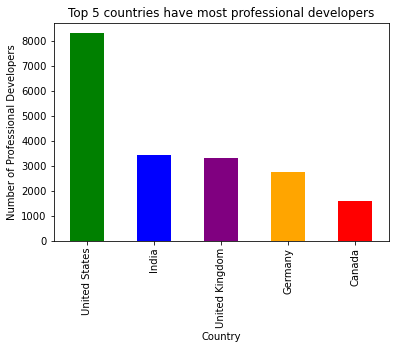

In [10]:
ques1_df[:5].plot(kind="bar", title="Top 5 countries have most professional developers",\
             xlabel="Country", ylabel="Number of Professional Developers",\
             color=["g", "b", "purple", "orange", "r"])

#### 1. Top 5 countries have most professional developers: US, India, UK, Germany and Canada
<table>
<tr float="left">
   <td><img src="images/ques1.PNG"></td>
   <td><img src="images/output1.PNG"/></td>
</tr>
    </table>

In [11]:
new_df["haveworkedlanguagepython"] = new_df.apply(lambda x: 1 if \
        "Python" in str(x["HaveWorkedLanguage"]) else 0, axis=1)

C:\Users\phucht2\AppData\Local\Temp/ipykernel_22560/3247795662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["haveworkedlanguagepython"] = new_df.apply(lambda x: 1 if \


In [12]:
new_df.head(2)

,Respondent,Country,Professional,HaveWorkedLanguage,WantWorkLanguage,Salary,haveworkedlanguagepython
0,1,United States,Student,Swift,Swift,NaN,0
1,2,United Kingdom,Student,JavaScript; Python; Ruby; SQL,Java; Python; Ruby; SQL,NaN,1


In [53]:
ques2_df = new_df.Country[new_df.haveworkedlanguagepython == 1].value_counts()

In [54]:
ques2_df[:5]

United States     3348
United Kingdom    1038
Germany            947
India              735
Canada             620
Name: Country, dtype: int64

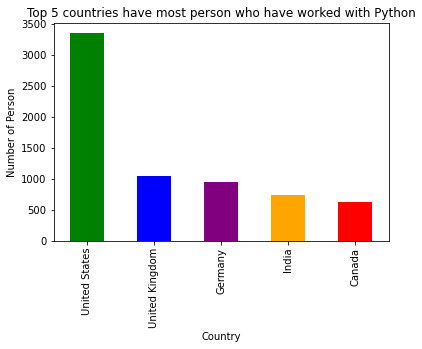

In [55]:
ques2_df[:5].plot(kind="bar", title="Top 5 countries have most person who have worked with Python",\
             xlabel="Country", ylabel="Number of Person",\
             color=["g", "b", "purple", "orange", "r"])

#### 2. Top 5 countries have most person who have worked Python: US, UK, Germany, India and Canada
<table>
<tr float="left">
    <td><img src="images/ques2.PNG"/></td>
    <td><img src="images/output2.PNG"/></td>
</tr>
</table>

In [56]:
ques3_python_df = new_df.Salary[new_df.haveworkedlanguagepython == 1].mean()

In [57]:
ques3_other_df = new_df.Salary[new_df.haveworkedlanguagepython != 1].mean()

In [58]:
ques3_df = pd.DataFrame({"Python": [str(int(ques3_other_df)) + "$/ year"], \
                         "Not Python":[str(int(ques3_python_df)) + "$/ year"]}, index=None)

In [59]:
ques3_df

,Python,Not Python
0,54352$/ year,61641$/ year


#### 3. Compare average salary of person who used to work with Python language with Others


<img src="images/output3.PNG">
It can be seen that, average salary of person who used to work with Python language is less than the average salary of person who used to work with other languages